# Network Parameter Experiment: `market.margin.scalingFactor`

Experiment varies the network parameter `market.margin.scalingFactor` to the following two sets of values:

- `{"search_level": 1.050, "initial_margin": 1.100, "collateral_release": 1.150}`
- `{"search_level": 1.001, "initial_margin": 2.000, "collateral_release": 4.000}`

As the various scaling factors increase, the market-maker should have a larger balance in their margin account.

Notebook also shows the parameters affect on the size of the data-node postgres database.

## Notebook Setup

In [1]:
import os
from parameter_results.toolkit import SingleParameterExperimentTk

from vega_sim.scenario.common.utils.price_process import Granularity

In [2]:
experiment = SingleParameterExperimentTk(
    path=os.getcwd(),
    dt=1,
    granularity=Granularity.MINUTE,
)

## Market Data

### Market State

As the experiment uses a pre-configured ParameterExperiment scenario, the market should stay mostly in an "Active State".

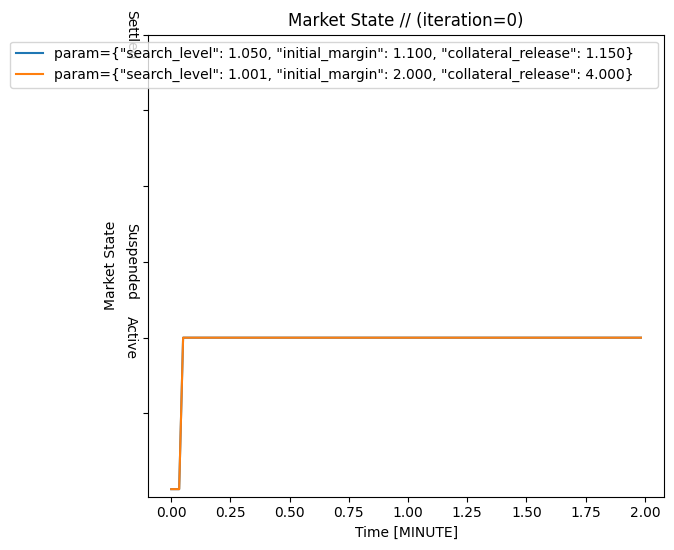

In [3]:
experiment.plot_results(variables=["Market State"])

### Open Interest

The Market Open Interest should be consistent across tested parameter values. Slight variation can be accredited to randomness from use of threads. If results vary dramatically across runs, increase the `environment_step_delay`.

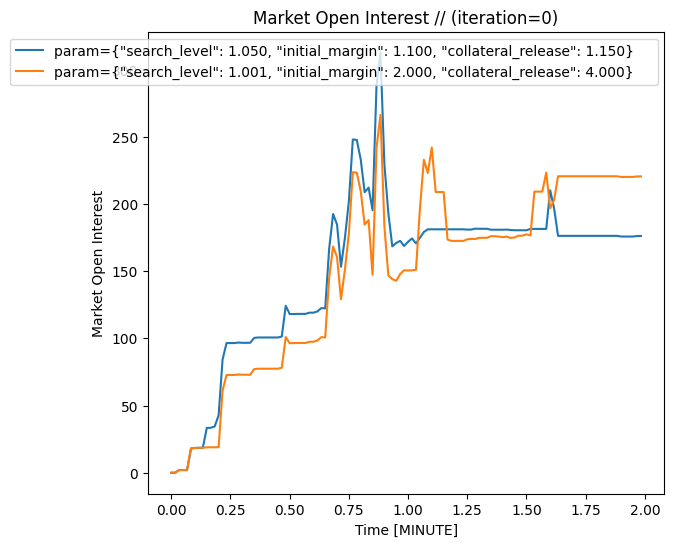

In [4]:
experiment.plot_results(variables=["Market Open Interest"])

## Market-Maker Results

### Position

The market-makers Position should be consistent across tested parameter values. Slight variation can be accredited to randomness from use of threads.  If results vary dramatically across runs, increase the `environment_step_delay`.

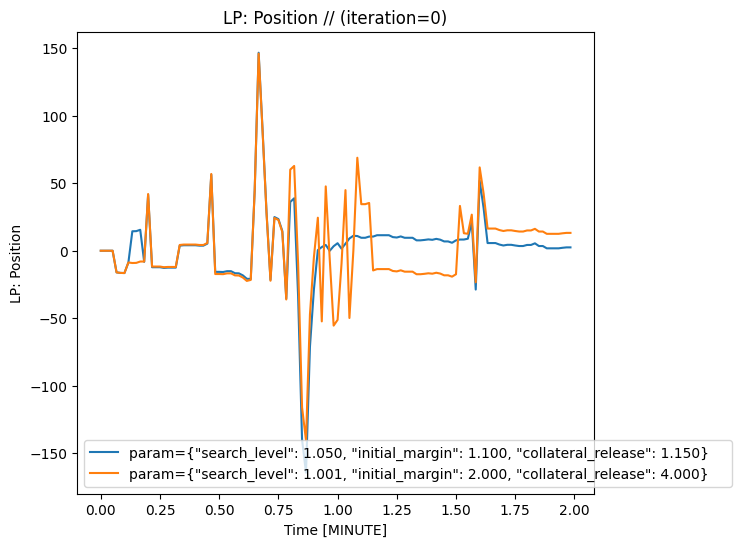

In [5]:
experiment.plot_results(variables=["LP: Position"])

### Margin

As the network parameter `market.margin.scalingFactor` the LP should require more funds in their margin account.

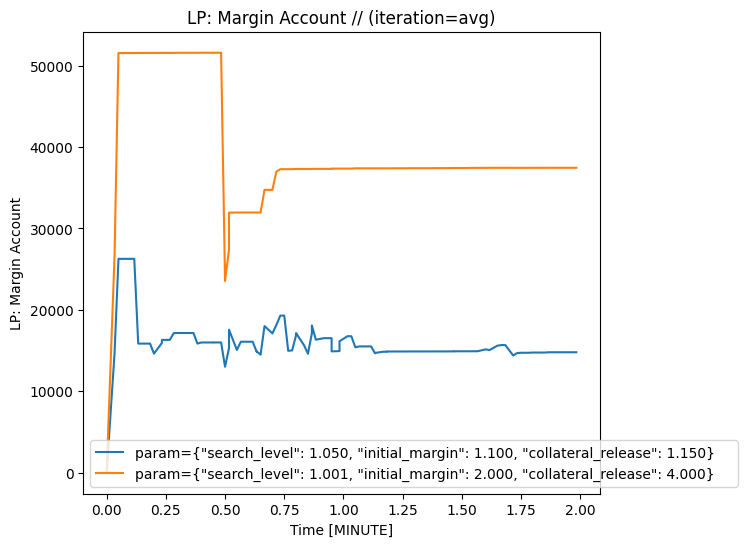

In [6]:
experiment.plot_results(variables=["LP: Margin Account"], iterations=["avg"])

## Datanode Performance

### Postgres Database Size

As the network parameter `market.margin.scalingFactor` is increased the size of the postgres database does not change.

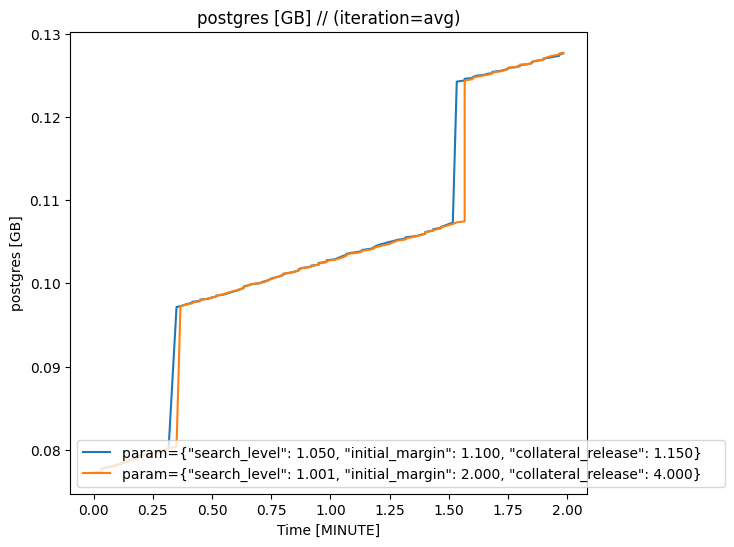

In [7]:
experiment.plot_results(variables=["postgres [GB]"], iterations=["avg"])